## Flight Delay Prediction EDA

This project aims to develop a machine learning model to predict flight delays at JFK Airport using historical flight and weather data. By accurately forecasting delays, the system can assist airlines and passengers in making informed decisions, optimizing schedules, and minimizing the impact of disruptions.

##### DATA INFORMATION

- Data Source: [Kaggle - Flight Take-Off Data JFK Airport](https://www.kaggle.com/datasets/deepankurk/flight-take-off-data-jfk-airport)
- Dataset has 28K rows and 23 columns 

##### Dataset Description

- *MONTH*: Month of the flight (1–12).
- *DAY_OF_MONTH*: Day of the month of the flight (1-31).
- *DAY_OF_WEEK*: Day of the week (1=Monday, 7=Sunday).
- *OP_UNIQUE_CARRIER*: Unique airline carrier code.
- *TAIL_NUM*: Aircraft tail number (unique plane identifier).
- *DEST*: Destination airport code.
- *DEP_DELAY*: Departure delay in minutes.
- *CRS_ELAPSED_TIME*: Scheduled elapsed flight time in minutes.
- *DISTANCE*: Distance between JFK and the destination (in miles).
- *CRS_DEP_M*: Scheduled departure time (Minutes since midnight format).
- *DEP_TIME_M*: Actual departure time (Minutes since midnight format).
- *CRS_ARR_M*: Scheduled arrival time (Minutes since midnight format).
- *Temperature*: Temperature at the time of departure.
- *Dew Point*: Dew point temperature (indicator of humidity).
- *Humidity*:  Humidity 
- *Wind*: Wind direction.
- *Wind Speed*: Speed of the wind.
- *Wind Gust*: Gust speed of the wind.
- *Pressure*: Atmospheric pressure at the airport.
- *Condition*: Weather condition description (e.g., Clear, Rain, Snow).
- *sch_dep*: Number of flights scheduled for departure.
- *sch_arr*: Number of flights scheduled for arrival.
- *TAXI_OUT*: Taxi-out time in minutes (time between gate pushback and takeoff).



##### IMPORT

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

##### LOAD DATA

In [2]:
df = pd.read_csv(r"C:\Users\layas\Desktop\Laya\Project Files\JFK-Flight-Delay-Prediction\data.csv")

In [3]:
df.shape

(28820, 23)

In [4]:
df.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'TAIL_NUM',
       'DEST', 'DEP_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_M',
       'DEP_TIME_M', 'CRS_ARR_M', 'Temperature', 'Dew Point', 'Humidity',
       'Wind', 'Wind Speed', 'Wind Gust', 'Pressure', 'Condition', 'sch_dep',
       'sch_arr', 'TAXI_OUT'],
      dtype='object')

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isna().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

There are no duplicates or missing values in the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

There are 6 Categorical features and 17 Numerical Features

In [8]:
df.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,6.374983,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,38.735144,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


 📊 Key Insights from Dataset (`df.describe()`)

1. **Mean departure delay** is **6.37 minutes**, with a **maximum delay of 1276 minutes (~21 hours)**, indicating the presence of **extreme outliers**.

2. **75% of flights** have delays of **2 minutes or less**, suggesting a **right-skewed distribution** with a few significantly delayed flights.

3. **Flight distance** ranges from **94 to 4983 miles**, indicating the dataset contains a mix of **short-haul and long-haul flights**.

4. Based on the **temperature range (17°F to 68°F)** and **mean (~41.5°F)**, the dataset likely represents **cold-weather conditions**.

5. **Atmospheric pressure** shows a **small range and low variance**, implying relatively **stable weather conditions** during the recorded flights.

6. Time-related columns such as **CRS_DEP_M**, **DEP_TIME_M**, and **CRS_ARR_M** have maximum values close to **1440**, and contain values where the last two digits exceed **59**, indicating they are in the **"minutes since midnight"** format rather than HHMM.



In [24]:
# Select categorical columns
categorical_cols = list(df.select_dtypes(include=['object', 'category']).columns)

# Add "MONTH" and "DAY_OF_WEEK" columns manually
categorical_cols.extend(["MONTH", "DAY_OF_WEEK"])

for col in categorical_cols:
    print(f"Value counts for column '{col}':")
    print(df[col].value_counts(dropna=False))  # include NaNs if any
    print("\n" + "-"*40 + "\n")


Value counts for column 'OP_UNIQUE_CARRIER':
OP_UNIQUE_CARRIER
B6    9589
DL    7680
9E    4485
AA    3595
AS    1111
MQ    1045
YX     914
OO     311
HA      90
Name: count, dtype: int64

----------------------------------------

Value counts for column 'TAIL_NUM':
TAIL_NUM
N102NN    108
N103NN    103
N2002J    101
N2016J    100
N107NN     99
         ... 
N156AN      1
N835MH      1
N983NN      1
N976NN      1
N217JQ      1
Name: count, Length: 2092, dtype: int64

----------------------------------------

Value counts for column 'DEST':
DEST
LAX    2974
SFO    1678
BOS    1243
FLL    1008
MCO     947
       ... 
ABQ      58
PHL      48
RNO      47
EGE      44
JAC       5
Name: count, Length: 65, dtype: int64

----------------------------------------

Value counts for column 'Dew Point':
Dew Point
33    1349
34    1156
30    1132
35    1124
32    1116
      ... 
56      29
2       28
59      22
57      13
67       3
Name: count, Length: 64, dtype: int64

------------------------------

1. The dataset covers a three-month period spanning November, December, and January
2. B6 has the highest number of flights followed by DL
3. LAX (Los Angeles International Airport) is the most frequent destination followed by SFO(San Francisco) and BOS(Boston)
4. The dataset includes 65 different destinations, showing wide geographic coverage.


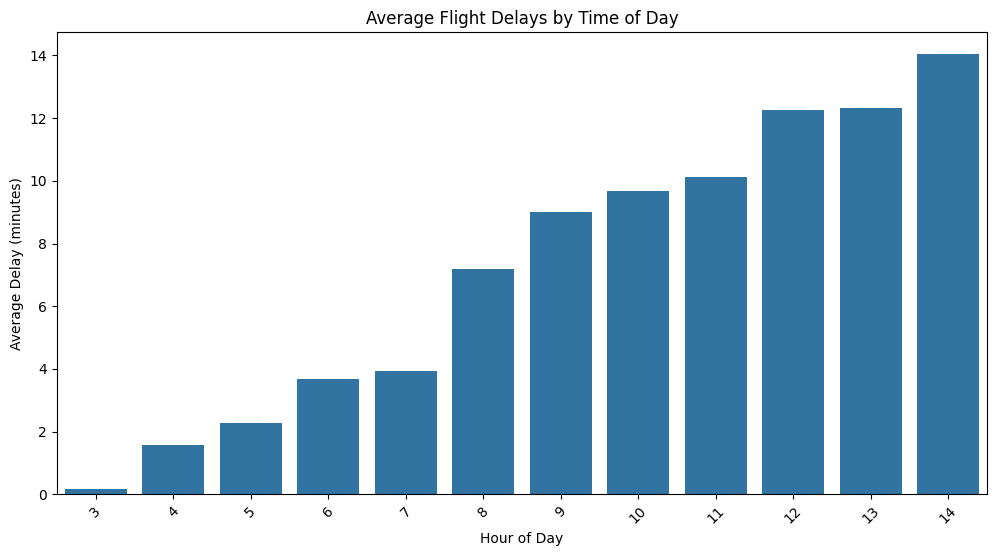

In [9]:
# Convert CRSDepTime to hours
df['DepHour'] = df['CRS_DEP_M'] // 100

# Calculate average delay by hour
average_delays_by_hour = df.groupby('DepHour')['DEP_DELAY'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=average_delays_by_hour, x='DepHour', y='DEP_DELAY')
plt.title('Average Flight Delays by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

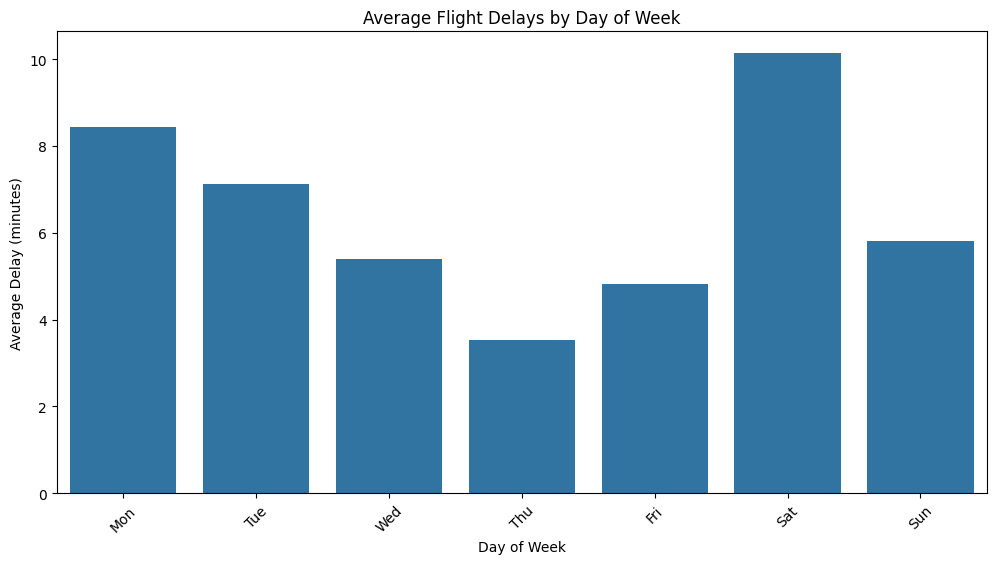

In [10]:
# Calculate average delay by hour
average_delays_by_dayofweek = df.groupby('DAY_OF_WEEK')['DEP_DELAY'].mean().reset_index()

# Mapping numbers to weekday names
day_mapping = {1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'}

# Apply the mapping to a new column for labeling
average_delays_by_dayofweek['DayName'] = average_delays_by_dayofweek['DAY_OF_WEEK'].map(day_mapping)

# Plot using the day names
plt.figure(figsize=(12, 6))
sns.barplot(data=average_delays_by_dayofweek, x='DayName', y='DEP_DELAY')
plt.title('Average Flight Delays by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.show()

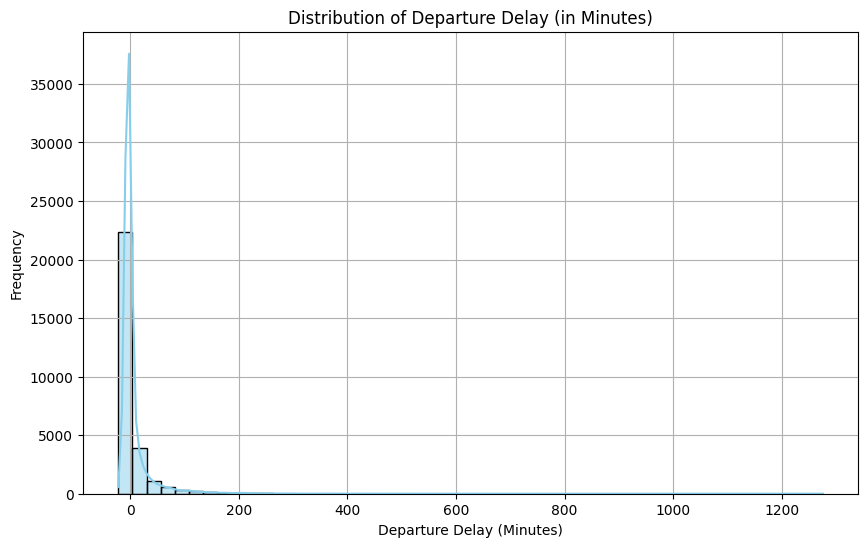

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['DEP_DELAY'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Departure Delay (in Minutes)')
plt.xlabel('Departure Delay (Minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


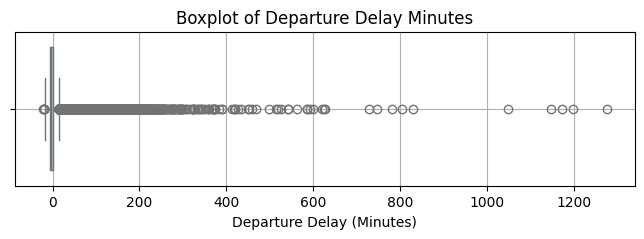

In [12]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['DEP_DELAY'], color='lightgreen')
plt.title('Boxplot of Departure Delay Minutes')
plt.xlabel('Departure Delay (Minutes)')
plt.grid(True)
plt.show()


In [13]:
df_outlier= df[ df['DEP_DELAY']<=700 ]


In [14]:
Q3= df['DEP_DELAY'].quantile(0.75)
Q1= df['DEP_DELAY'].quantile(0.25)
IQR= Q3-Q1
UL= Q3 + (1.5)*IQR
LL= Q1 - (1.5)*IQR
df_IQR= df[ (df['DEP_DELAY']>=LL) & (df['DEP_DELAY']<=UL) ]

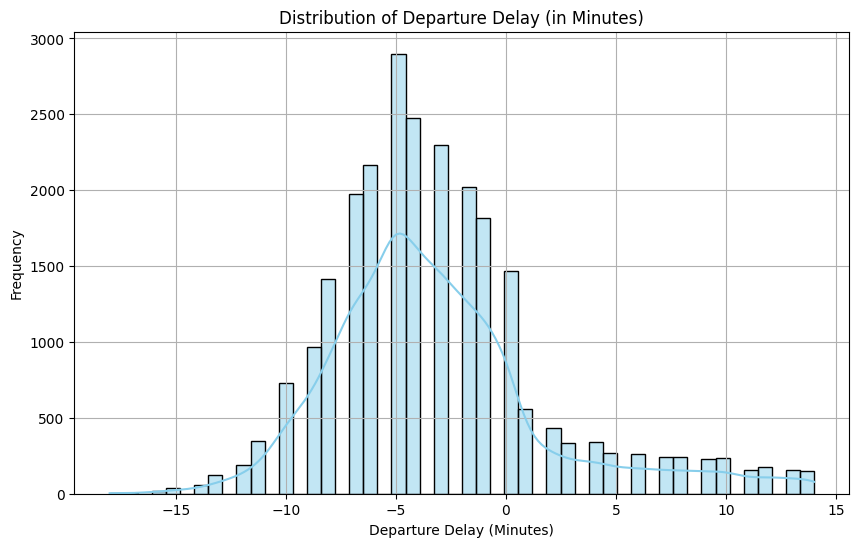

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_IQR['DEP_DELAY'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Departure Delay (in Minutes)')
plt.xlabel('Departure Delay (Minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


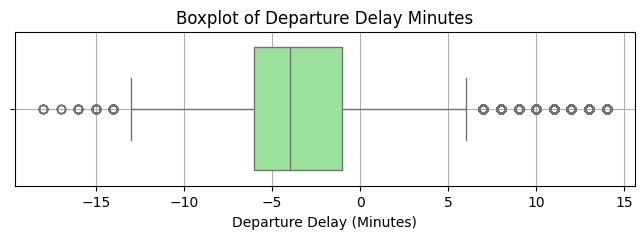

In [16]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df_IQR['DEP_DELAY'], color='lightgreen')
plt.title('Boxplot of Departure Delay Minutes')
plt.xlabel('Departure Delay (Minutes)')
plt.grid(True)
plt.show()


C:\Users\layas\AppData\Local\Temp\ipykernel_17752\2610783799.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='DEP_DELAY', data=avg_delay, palette='viridis')


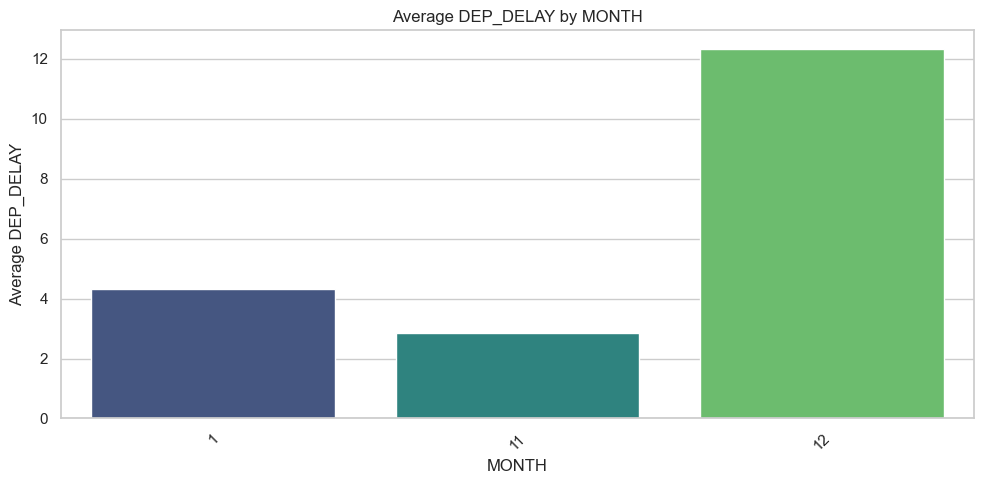

C:\Users\layas\AppData\Local\Temp\ipykernel_17752\2610783799.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='DEP_DELAY', data=avg_delay, palette='viridis')


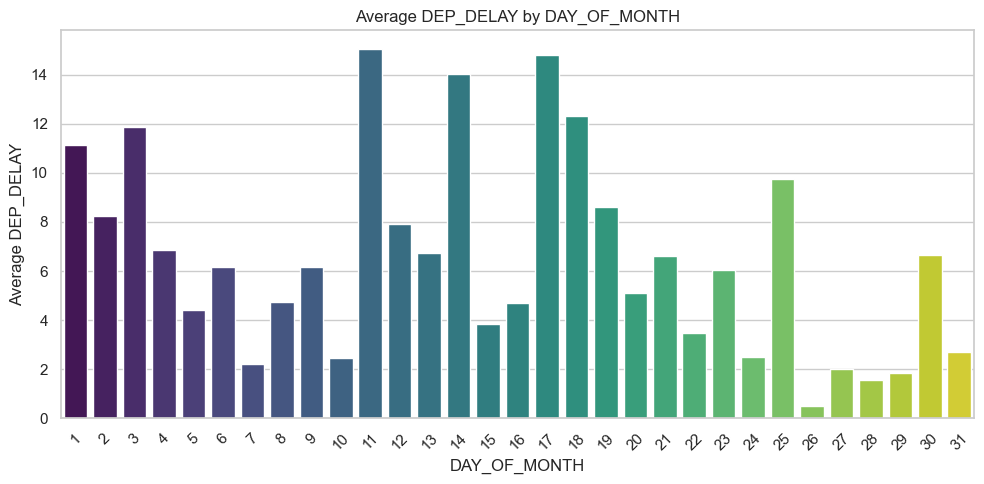

C:\Users\layas\AppData\Local\Temp\ipykernel_17752\2610783799.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='DEP_DELAY', data=avg_delay, palette='viridis')


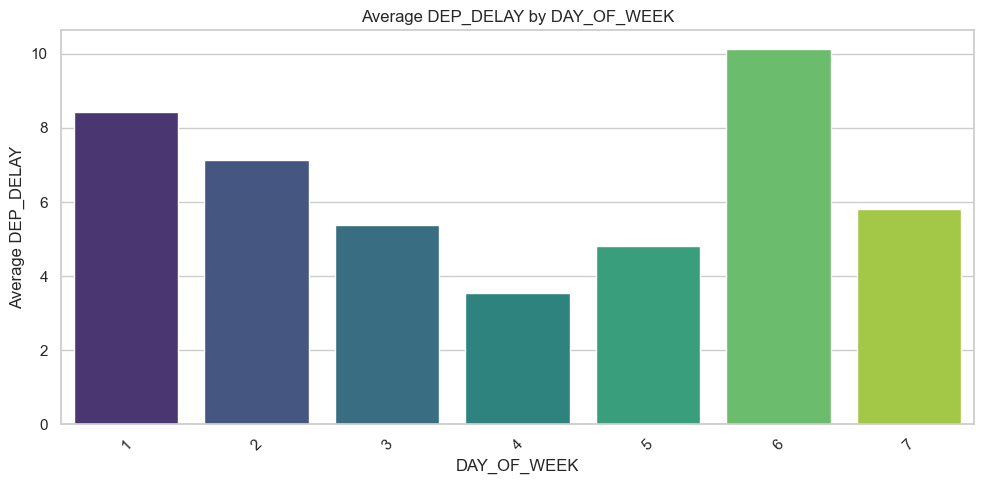

C:\Users\layas\AppData\Local\Temp\ipykernel_17752\2610783799.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='DEP_DELAY', data=avg_delay, palette='viridis')


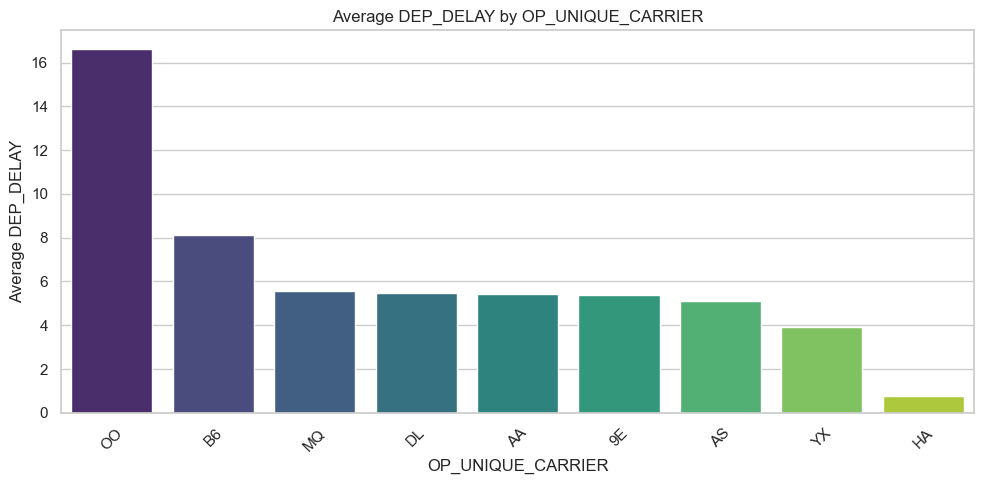

C:\Users\layas\AppData\Local\Temp\ipykernel_17752\2610783799.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='DEP_DELAY', data=avg_delay, palette='viridis')


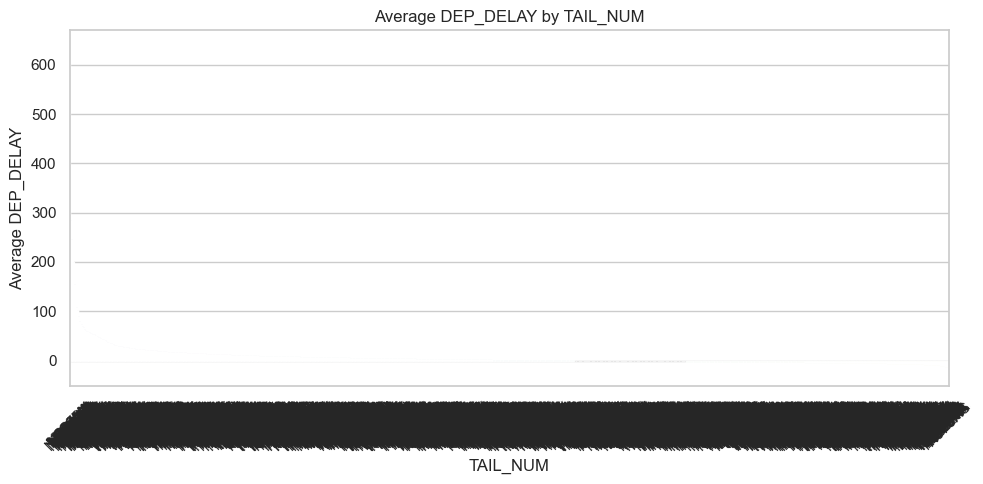

C:\Users\layas\AppData\Local\Temp\ipykernel_17752\2610783799.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='DEP_DELAY', data=avg_delay, palette='viridis')


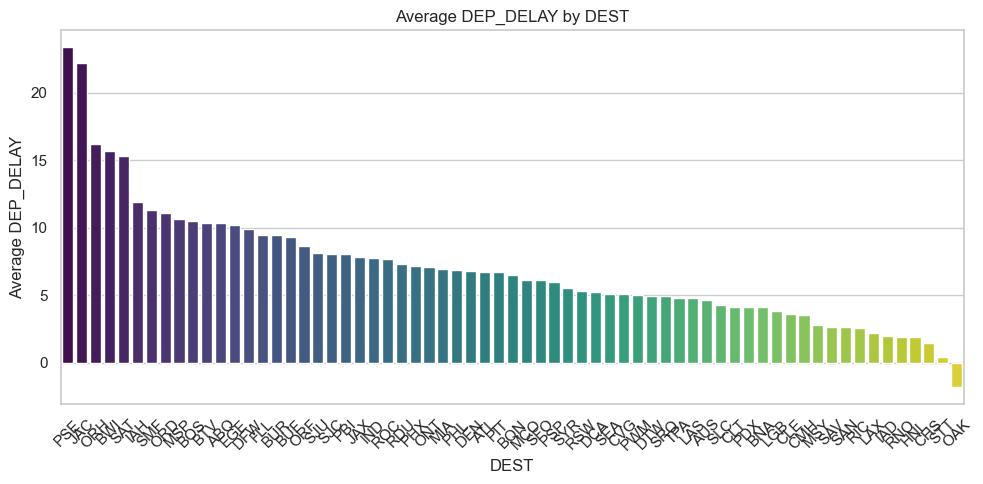

C:\Users\layas\AppData\Local\Temp\ipykernel_17752\2610783799.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='DEP_DELAY', data=avg_delay, palette='viridis')


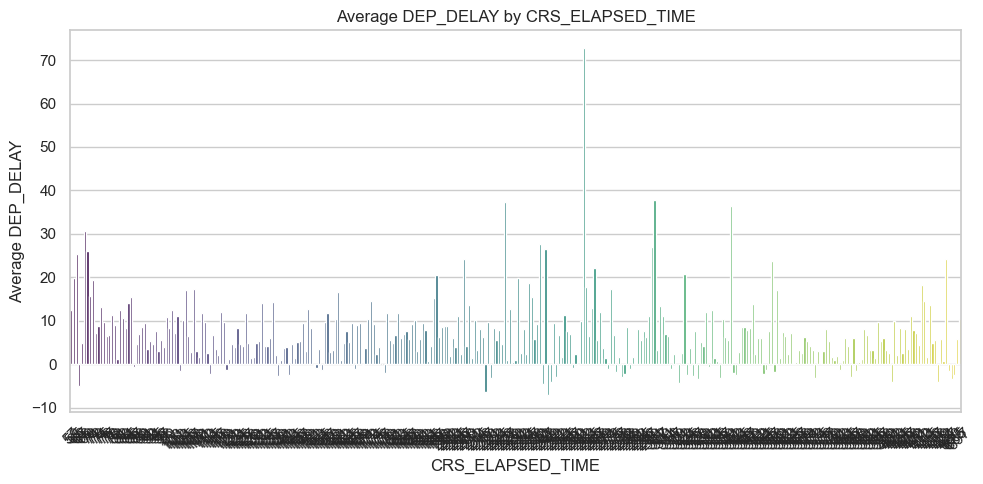

C:\Users\layas\AppData\Local\Temp\ipykernel_17752\2610783799.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='DEP_DELAY', data=avg_delay, palette='viridis')


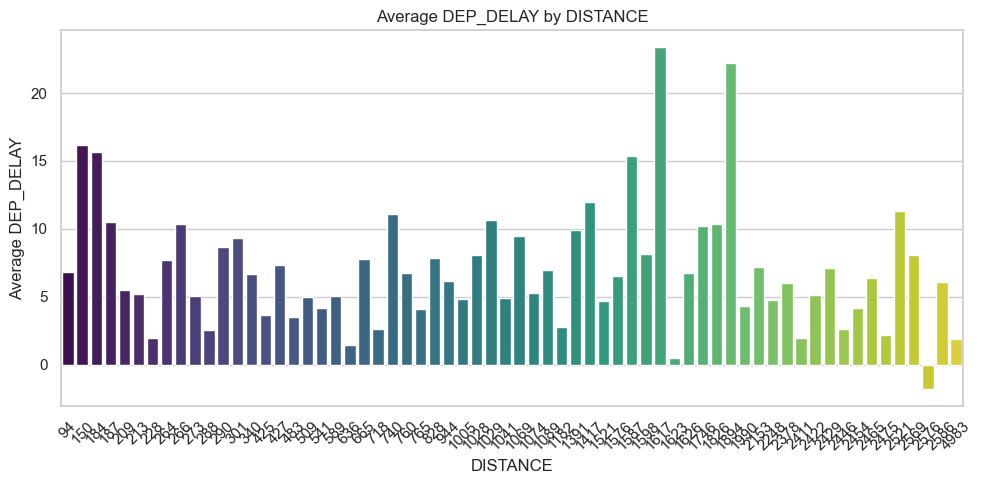

C:\Users\layas\AppData\Local\Temp\ipykernel_17752\2610783799.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='DEP_DELAY', data=avg_delay, palette='viridis')


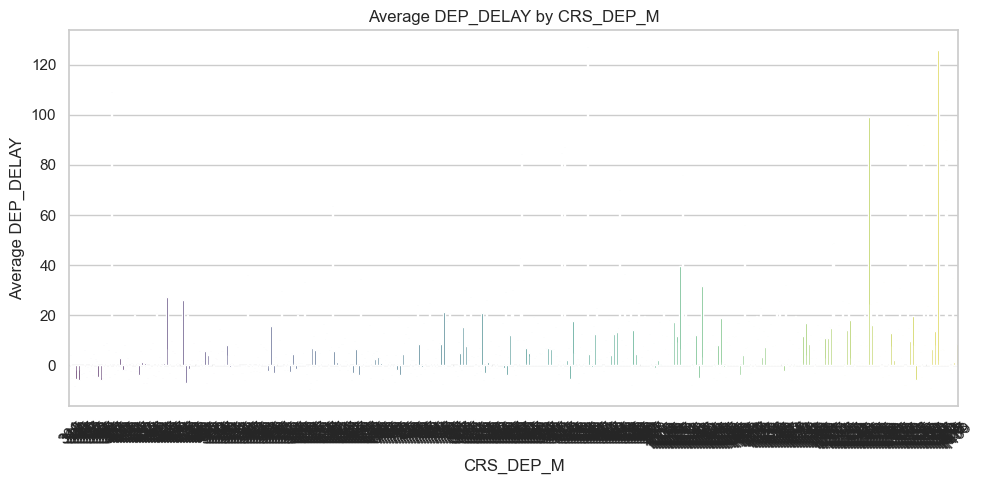

C:\Users\layas\AppData\Local\Temp\ipykernel_17752\2610783799.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='DEP_DELAY', data=avg_delay, palette='viridis')


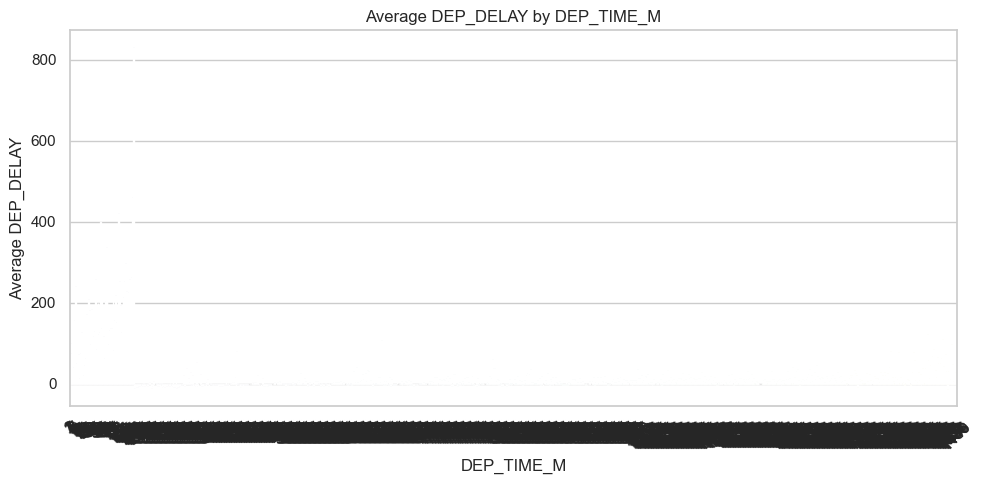

C:\Users\layas\AppData\Local\Temp\ipykernel_17752\2610783799.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='DEP_DELAY', data=avg_delay, palette='viridis')


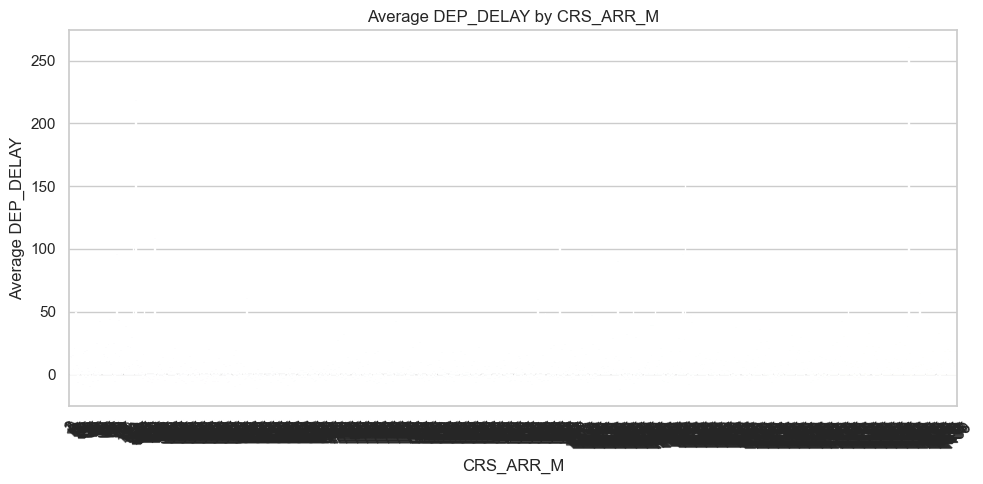

C:\Users\layas\AppData\Local\Temp\ipykernel_17752\2610783799.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='DEP_DELAY', data=avg_delay, palette='viridis')


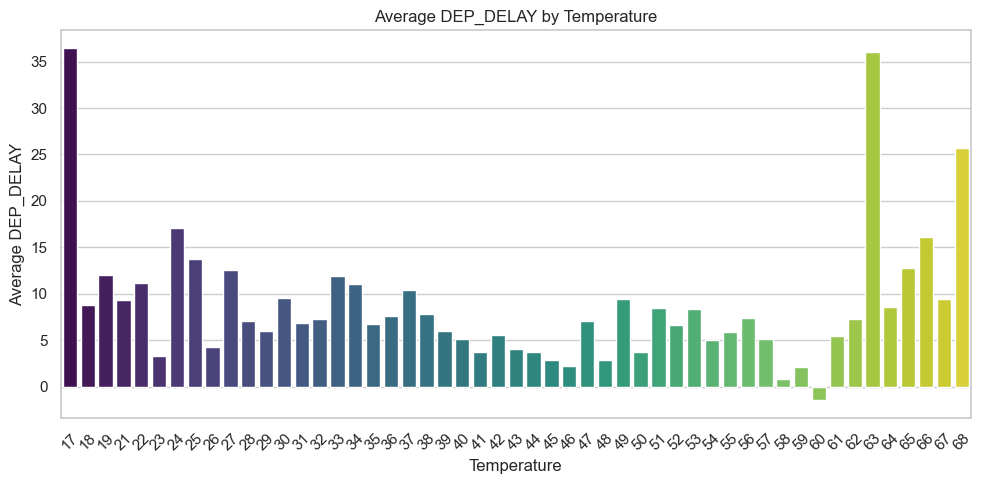

C:\Users\layas\AppData\Local\Temp\ipykernel_17752\2610783799.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='DEP_DELAY', data=avg_delay, palette='viridis')


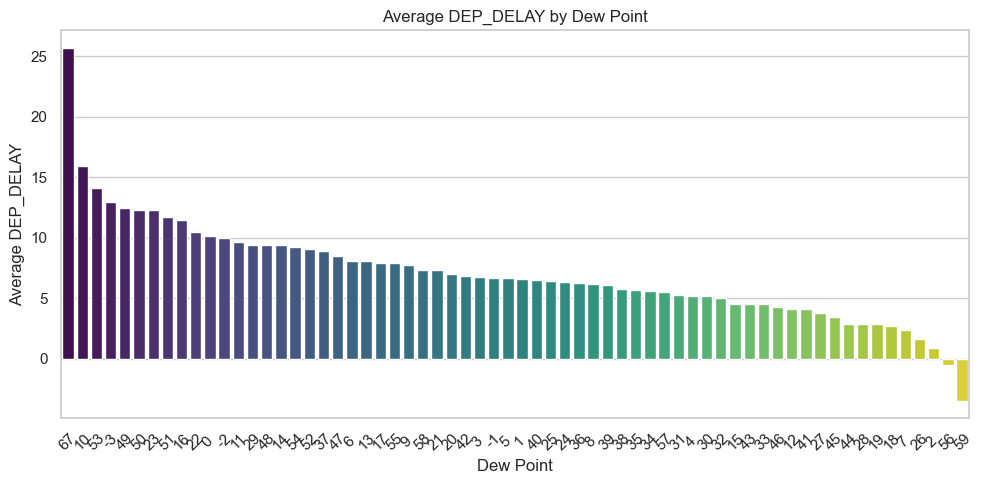

C:\Users\layas\AppData\Local\Temp\ipykernel_17752\2610783799.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='DEP_DELAY', data=avg_delay, palette='viridis')


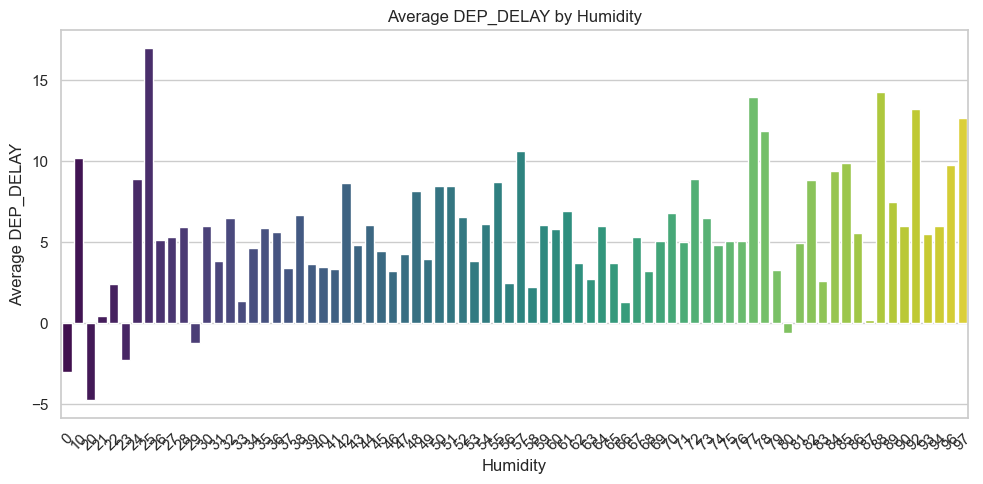

C:\Users\layas\AppData\Local\Temp\ipykernel_17752\2610783799.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='DEP_DELAY', data=avg_delay, palette='viridis')


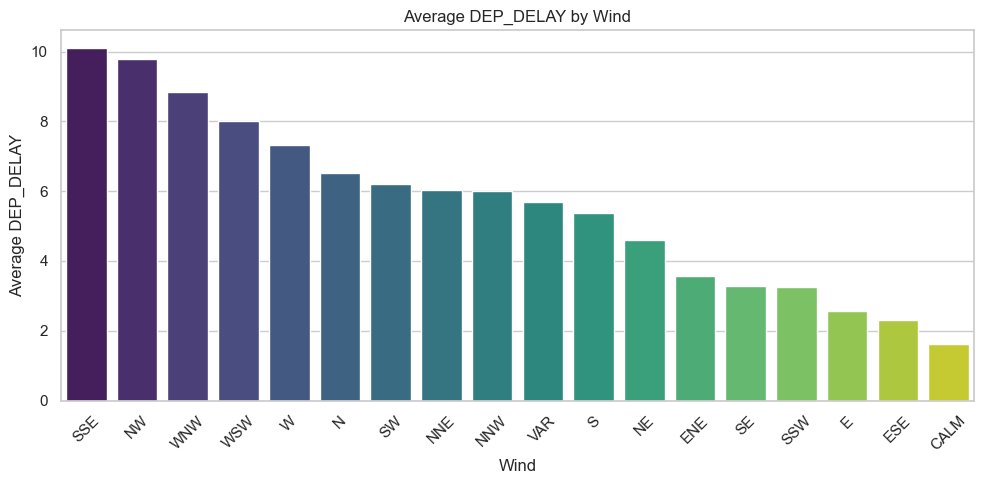

C:\Users\layas\AppData\Local\Temp\ipykernel_17752\2610783799.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='DEP_DELAY', data=avg_delay, palette='viridis')


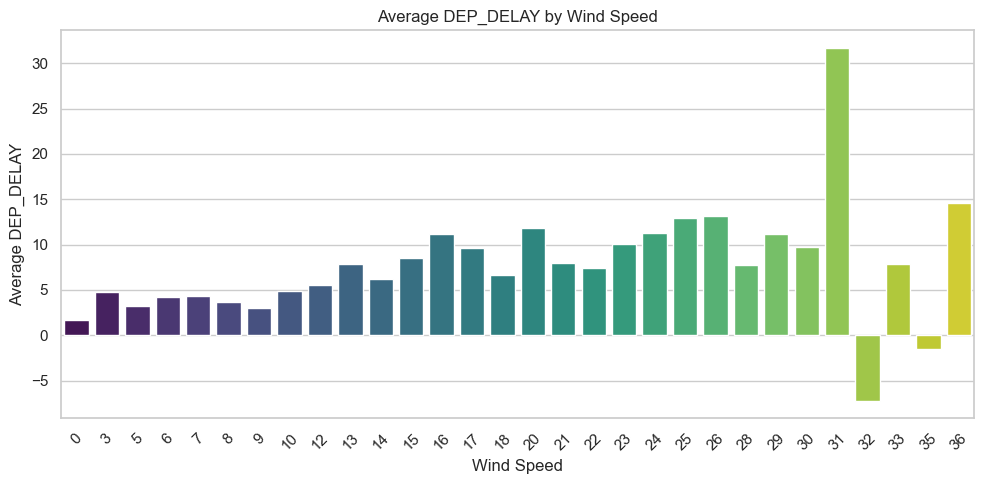

C:\Users\layas\AppData\Local\Temp\ipykernel_17752\2610783799.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='DEP_DELAY', data=avg_delay, palette='viridis')


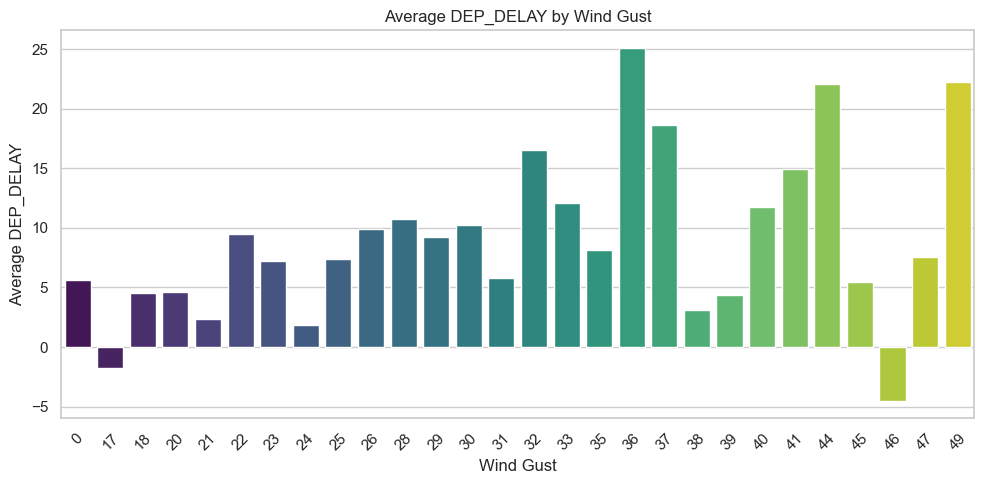

C:\Users\layas\AppData\Local\Temp\ipykernel_17752\2610783799.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='DEP_DELAY', data=avg_delay, palette='viridis')


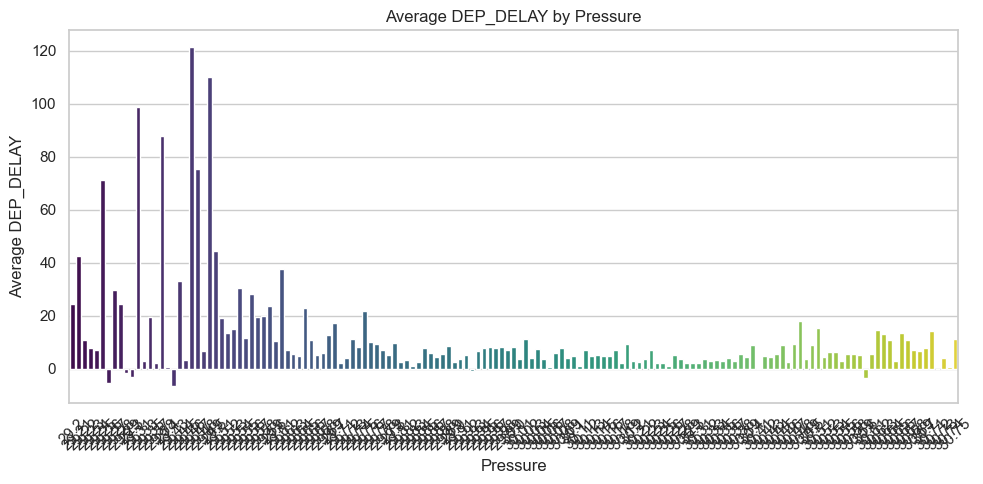

C:\Users\layas\AppData\Local\Temp\ipykernel_17752\2610783799.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='DEP_DELAY', data=avg_delay, palette='viridis')


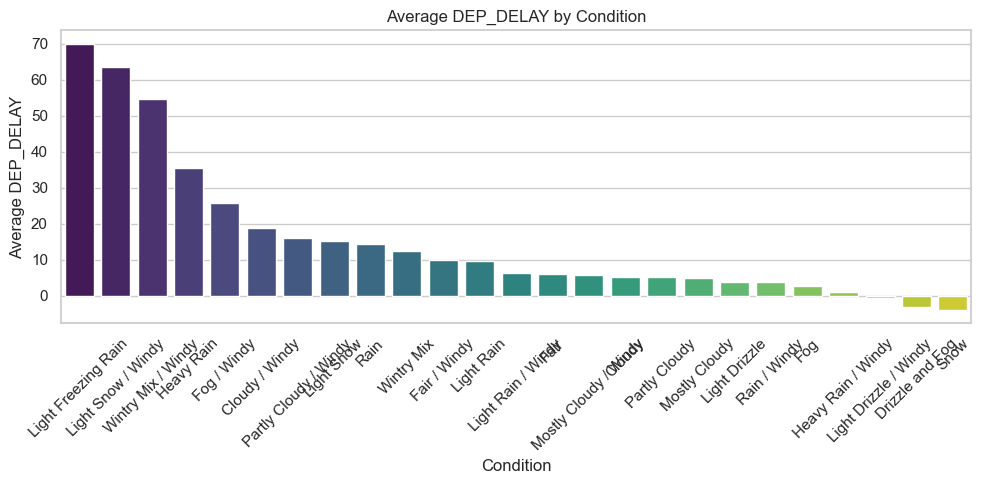

C:\Users\layas\AppData\Local\Temp\ipykernel_17752\2610783799.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='DEP_DELAY', data=avg_delay, palette='viridis')


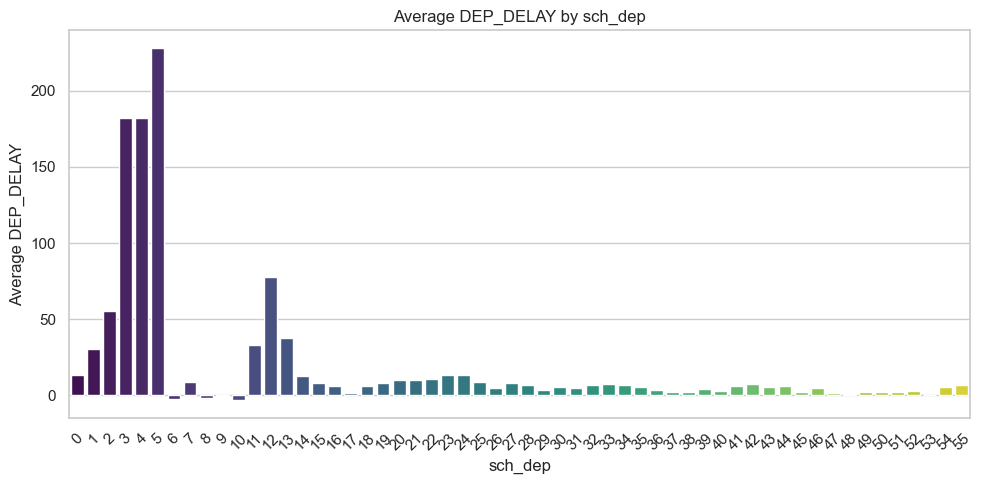

C:\Users\layas\AppData\Local\Temp\ipykernel_17752\2610783799.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='DEP_DELAY', data=avg_delay, palette='viridis')


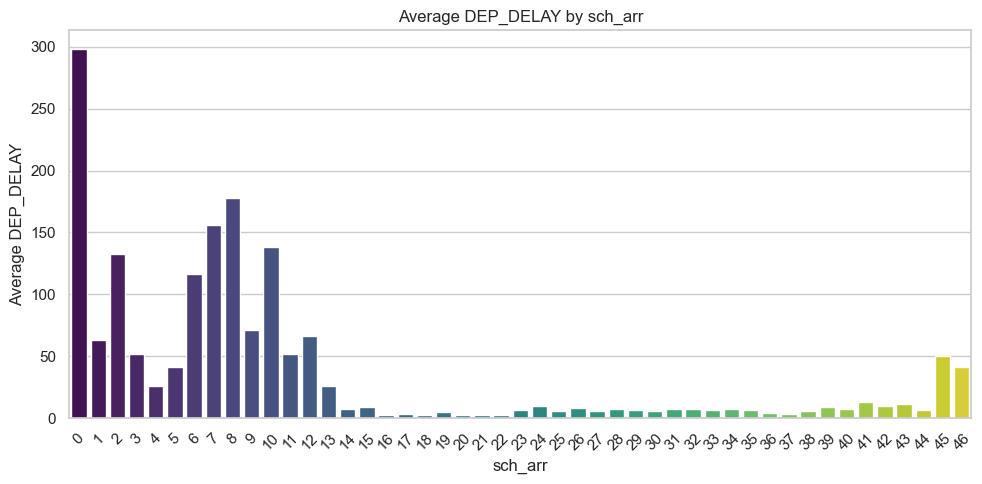

C:\Users\layas\AppData\Local\Temp\ipykernel_17752\2610783799.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='DEP_DELAY', data=avg_delay, palette='viridis')


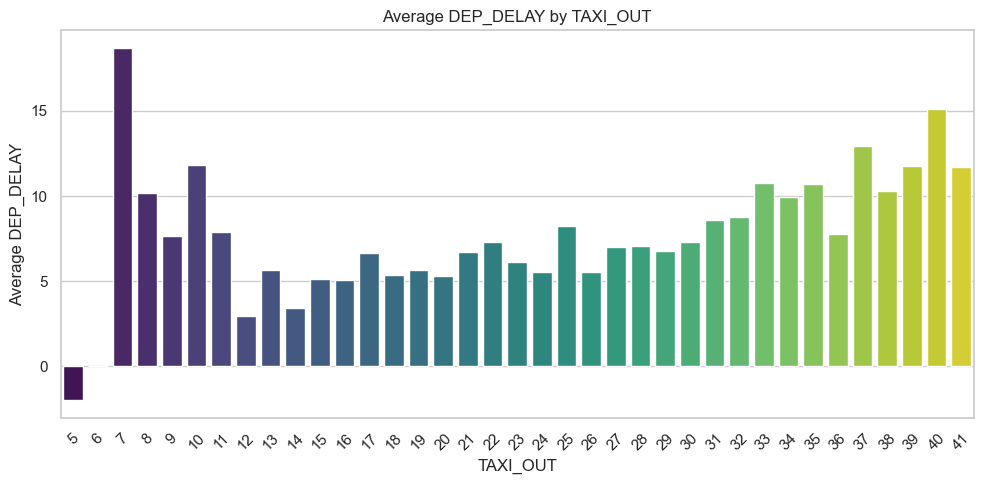

C:\Users\layas\AppData\Local\Temp\ipykernel_17752\2610783799.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='DEP_DELAY', data=avg_delay, palette='viridis')


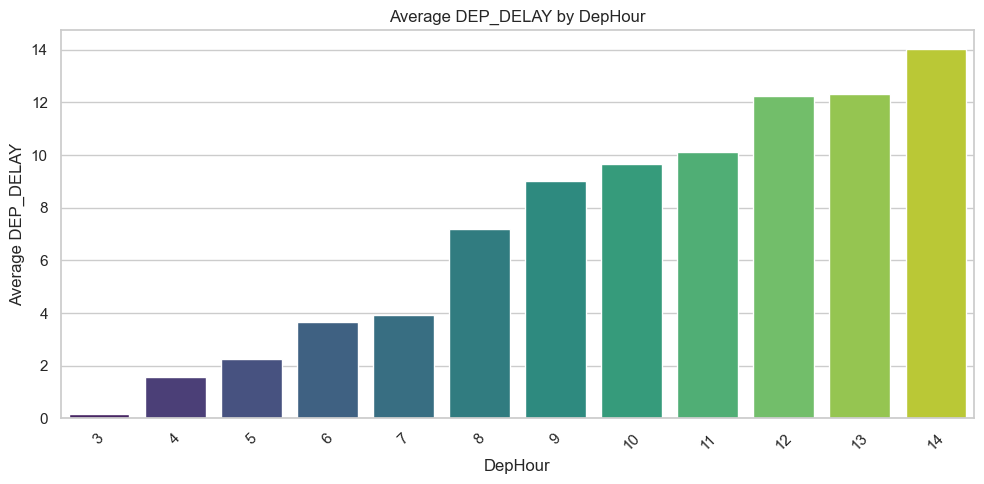

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Loop through all columns except 'DEP_DELAY'
for col in df.columns:
    if col == 'DEP_DELAY':
        continue

    plt.figure(figsize=(10, 5))

    # Group by the column and compute mean DEP_DELAY
    avg_delay = df.groupby(col)['DEP_DELAY'].mean().reset_index()

    # Sort values by average delay (optional for readability)
    avg_delay = avg_delay.sort_values('DEP_DELAY', ascending=False)

    # Plot barplot
    sns.barplot(x=col, y='DEP_DELAY', data=avg_delay, palette='viridis')
    plt.title(f'Average DEP_DELAY by {col}')
    plt.ylabel('Average DEP_DELAY')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
